In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD

fetching the dataset

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(
    'data',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
)

Found 1141 files belonging to 2 classes.


In [ ]:
len(data)

36

In [ ]:
36 * 32

1152

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

the dataset represented as a numpy array


In [ ]:
batch = data_iterator.next()

preprocessing the data by applying the normalization technique


In [ ]:
batch[1]

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int32)

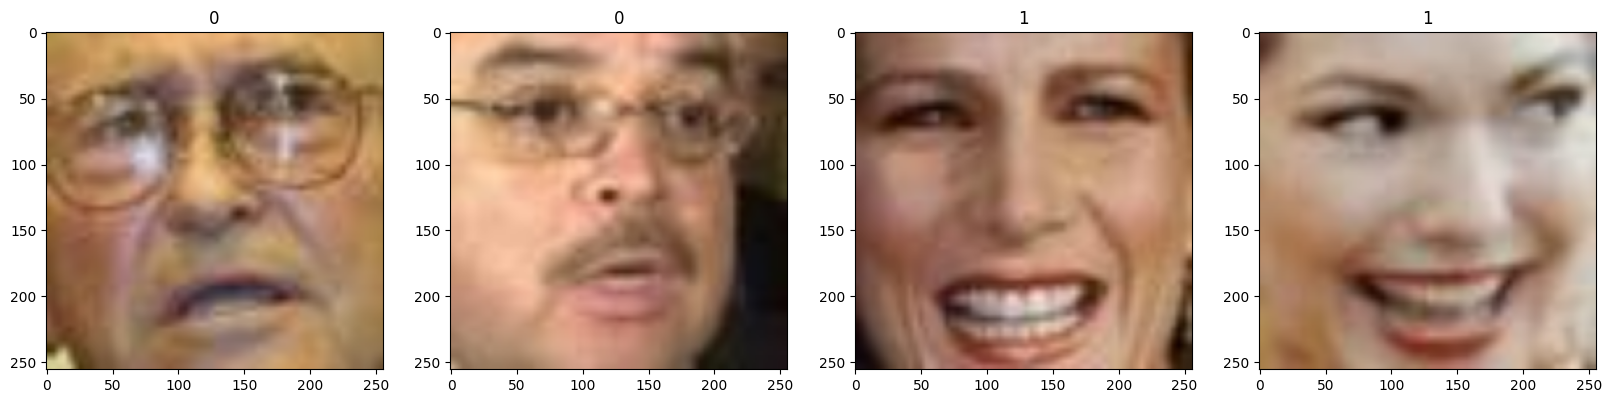

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_data = data.as_numpy_iterator().next()

In [ ]:
scaled_data[0].min()
scaled_data[0].max()

1.0

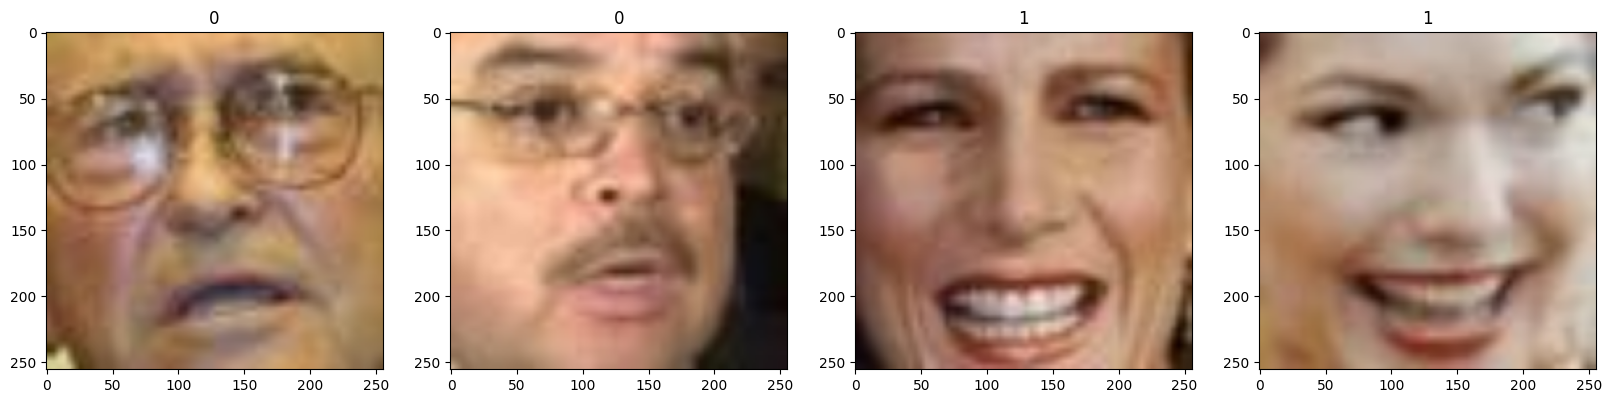

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Spliting The Data To Train Validate Test


In [ ]:
train_size = int(len(data)*0.7)
validate_size = int(len(data)*0.2)
test_size=int(len(data)*0.1)+1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(validate_size)
test = data.skip(train_size + validate_size).take(test_size)

Building the model

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
26/26 [==============================] - 66s 2s/step - loss: 0.9226 - accuracy: 0.5385 - val_loss: 0.6778 - val_accuracy: 0.6339
Epoch 2/20
26/26 [==============================] - 53s 2s/step - loss: 0.6361 - accuracy: 0.6803 - val_loss: 0.5445 - val_accuracy: 0.8125
Epoch 3/20
26/26 [==============================] - 49s 2s/step - loss: 0.4195 - accuracy: 0.8341 - val_loss: 0.2920 - val_accuracy: 0.8750
Epoch 4/20
26/26 [==============================] - 50s 2s/step - loss: 0.2800 - accuracy: 0.8942 - val_loss: 0.2220 - val_accuracy: 0.9107
Epoch 5/20
26/26 [==============================] - 64s 2s/step - loss: 0.2165 - accuracy: 0.9147 - val_loss: 0.1505 - val_accuracy: 0.9509
Epoch 6/20
26/26 [==============================] - 44s 2s/step - loss: 0.1927 - accuracy: 0.9243 - val_loss: 0.1724 - val_accuracy: 0.9241
Epoch 7/20
26/26 [==============================] - 47s 2s/step - loss: 0.1519 - accuracy: 0.9435 - val_loss: 0.1183 - val_accuracy: 0.9598
Epoch 8/20
26/26 [==

In [ ]:
hist

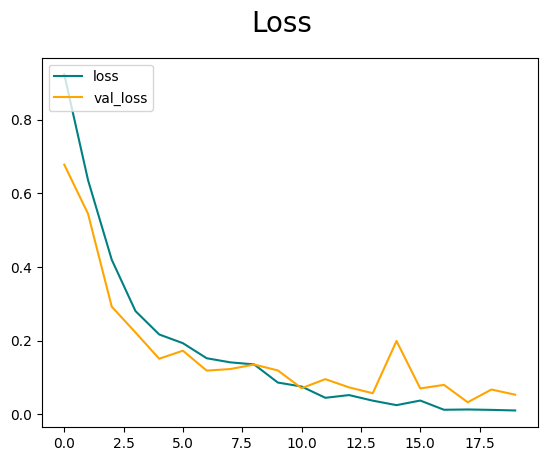

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

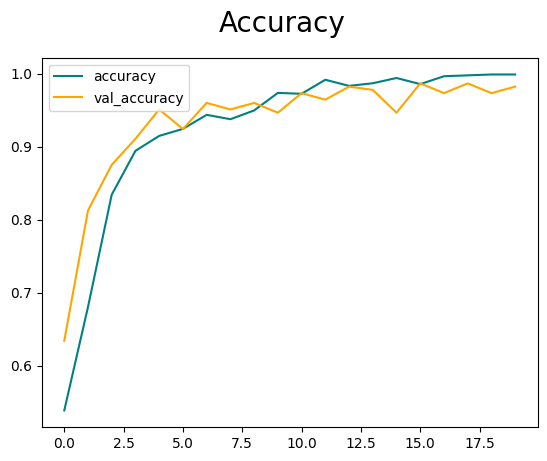

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 620ms/step


In [ ]:
print(f"precision: {pre.result().numpy()}, recall: {re.result().numpy()}, accuracy: {acc.result().numpy()}")

precision: 0.9836065769195557, recall: 0.9523809552192688, accuracy: 0.96875


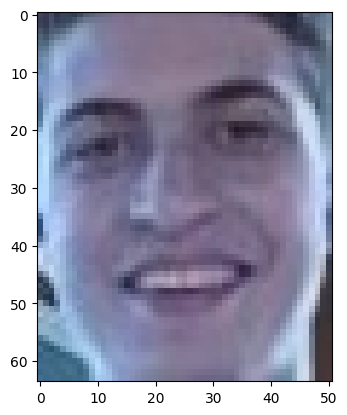

In [ ]:
img = cv2.imread("noor.jpg")
plt.imshow(img)

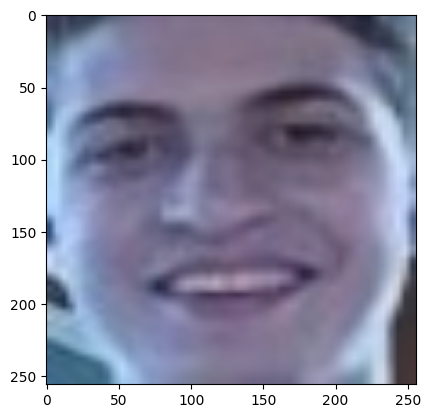

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

NameError: name 'model' is not defined

In [ ]:
if yhat >0.5:
  print("Smiling")
else:
  print("Not Smiling")

Smiling


In [ ]:
model2 = Sequential()
model2.add(Flatten(input_shape=(256, 256, 3)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


In [ ]:
learning_rate = 0.01
momentum = 0.9

optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_6 (Dense)             (None, 16)                3145744   
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3146833 (12.00 MB)
Trainable params: 3146833 (12.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist2 = model2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
25/25 [==============================] - 5s 133ms/step - loss: 0.8507 - accuracy: 0.5138 - val_loss: 0.6915 - val_accuracy: 0.5446
Epoch 2/20
25/25 [==============================] - 3s 120ms/step - loss: 0.6922 - accuracy: 0.5250 - val_loss: 0.6904 - val_accuracy: 0.5446
Epoch 3/20
25/25 [==============================] - 3s 108ms/step - loss: 0.6917 - accuracy: 0.5300 - val_loss: 0.6908 - val_accuracy: 0.5357
Epoch 4/20
25/25 [==============================] - 3s 108ms/step - loss: 0.6926 - accuracy: 0.5188 - val_loss: 0.6913 - val_accuracy: 0.5312
Epoch 5/20
25/25 [==============================] - 3s 104ms/step - loss: 0.6917 - accuracy: 0.5300 - val_loss: 0.6952 - val_accuracy: 0.4866
Epoch 6/20
25/25 [==============================] - 3s 113ms/step - loss: 0.6925 - accuracy: 0.5225 - val_loss: 0.6859 - val_accuracy: 0.5759
Epoch 7/20
25/25 [==============================] - 2s 94ms/step - loss: 0.6930 - accuracy: 0.5163 - val_loss: 0.6934 - val_accuracy: 0.5089
Epoch 8

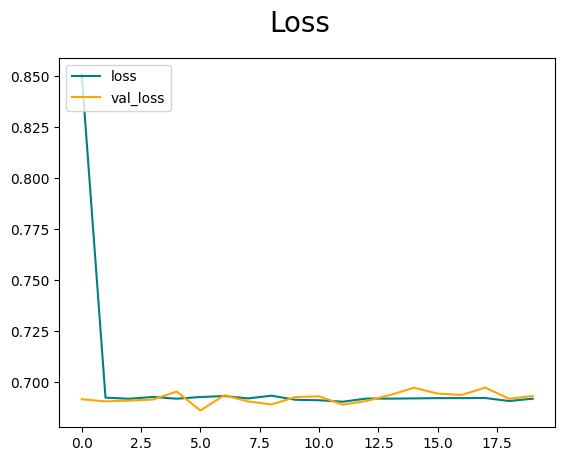

In [ ]:
fig = plt.figure()
plt.plot(hist2.history['loss'], color='teal', label='loss')
plt.plot(hist2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

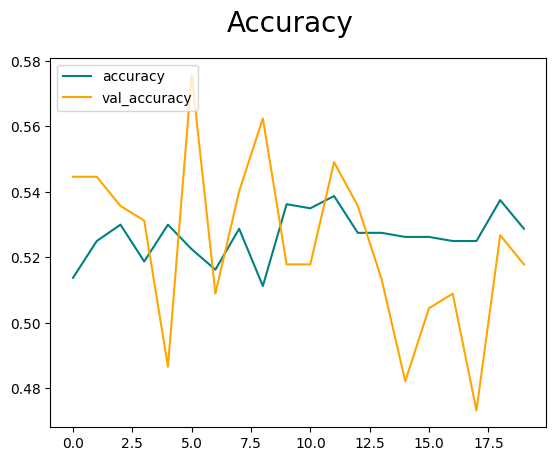

In [ ]:
fig = plt.figure()
plt.plot(hist2.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist2.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
pre2 = Precision()
re2 = Recall()
acc2 = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat2 = model2.predict(X)
    yhat2 = [1 if prediction > 0.5 else 0 for prediction in yhat2 ]
    pre2.update_state(y, yhat2)
    re2.update_state(y, yhat2)
    acc2.update_state(y, yhat2)

1/1 [==============================] - 0s 36ms/step


In [ ]:
print(f"precision: {pre2.result().numpy()}, recall: {re2.result().numpy()}, accuracy: {acc2.result().numpy()}")

precision: 0.49145299196243286, recall: 1.0, accuracy: 0.49145299196243286


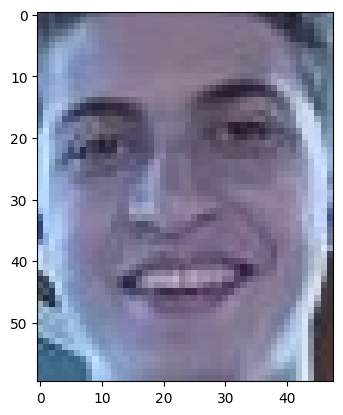

In [ ]:
img = cv2.imread("noor.jpg")
plt.imshow(img)

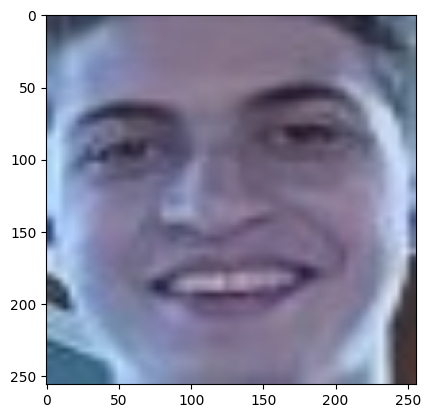

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat2 = model2.predict(np.expand_dims(resize/255, 0))
yhat2

1/1 [==============================] - 0s 33ms/step


array([[0.53362715]], dtype=float32)

In [ ]:
if yhat2 >0.5:
  print("Smiling")
else:
  print("Not Smiling")

Smiling


In [ ]:
model3 = Sequential()
model3.add(Flatten(input_shape=(256, 256, 3)))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import MeanSquaredError

optimizer = RMSprop(learning_rate=0.001)

loss_function = MeanSquaredError()

model3.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 32)                6291488   
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 1

In [ ]:
hist3 = model3.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
25/25 [==============================] - 5s 152ms/step - loss: 0.5154 - accuracy: 0.4712 - val_loss: 0.5179 - val_accuracy: 0.4821
Epoch 2/20
25/25 [==============================] - 4s 136ms/step - loss: 0.5212 - accuracy: 0.4787 - val_loss: 0.5223 - val_accuracy: 0.4777
Epoch 3/20
25/25 [==============================] - 4s 136ms/step - loss: 0.5288 - accuracy: 0.4712 - val_loss: 0.5134 - val_accuracy: 0.4866
Epoch 4/20
25/25 [==============================] - 4s 138ms/step - loss: 0.5312 - accuracy: 0.4688 - val_loss: 0.5491 - val_accuracy: 0.4509
Epoch 5/20
25/25 [==============================] - 4s 148ms/step - loss: 0.5362 - accuracy: 0.4638 - val_loss: 0.5491 - val_accuracy: 0.4509
Epoch 6/20
25/25 [==============================] - 4s 137ms/step - loss: 0.5325 - accuracy: 0.4675 - val_loss: 0.5045 - val_accuracy: 0.4955
Epoch 7/20
25/25 [==============================] - 3s 132ms/step - loss: 0.5250 - accuracy: 0.4750 - val_loss: 0.5446 - val_accuracy: 0.4554
Epoch 

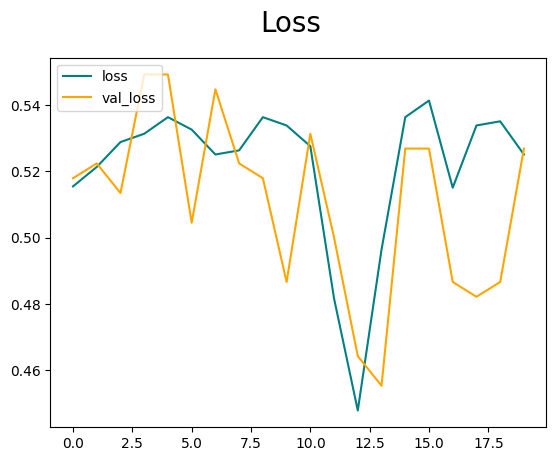

In [ ]:
fig = plt.figure()
plt.plot(hist3.history['loss'], color='teal', label='loss')
plt.plot(hist3.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

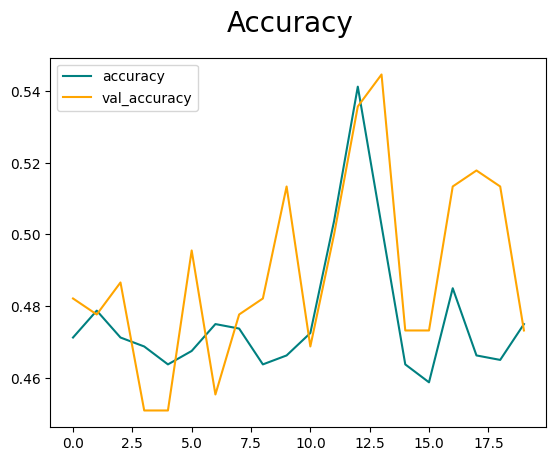

In [ ]:
fig = plt.figure()
plt.plot(hist3.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist3.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
pre3 = Precision()
re3 = Recall()
acc3 = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat3 = model3.predict(X)
    # yhat3 = [1 if prediction > 0.5 else 0 for prediction in yhat3 ] ask the TA
    pre3.update_state(y, yhat3)
    re3.update_state(y, yhat3)
    acc3.update_state(y, yhat3)

1/1 [==============================] - 0s 31ms/step


In [ ]:
print(f"precision: {pre3.result().numpy()}, recall: {re3.result().numpy()}, accuracy: {acc3.result().numpy()}")

precision: 0.0, recall: 0.0, accuracy: 0.5096153616905212


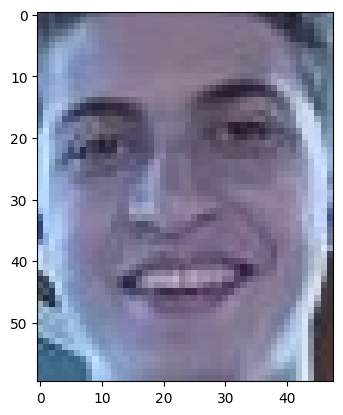

In [ ]:
img = cv2.imread("noor.jpg")
plt.imshow(img)

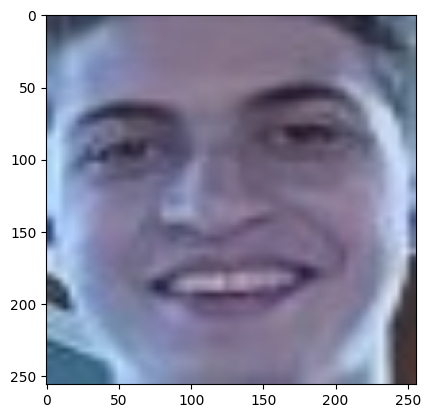

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat3 = model3.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [ ]:
if yhat3 >0.5:
  print("Smiling")
else:
  print("Not Smiling")

Not Smiling


In [ ]:
model4 = Sequential([
    Flatten(input_shape=(256, 256, 3)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


In [ ]:
model4.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 dense_10 (Dense)            (None, 128)               25165952  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)               

In [ ]:
hist4 = model4.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
25/25 [==============================] - 12s 422ms/step - loss: 16.0554 - accuracy: 0.4888 - val_loss: 0.6930 - val_accuracy: 0.5223
Epoch 2/20
25/25 [==============================] - 11s 424ms/step - loss: 0.6928 - accuracy: 0.5288 - val_loss: 0.6930 - val_accuracy: 0.5089
Epoch 3/20
25/25 [==============================] - 12s 485ms/step - loss: 0.8295 - accuracy: 0.5312 - val_loss: 0.6924 - val_accuracy: 0.5223
Epoch 4/20
25/25 [==============================] - 11s 447ms/step - loss: 0.6923 - accuracy: 0.5263 - val_loss: 0.6918 - val_accuracy: 0.5312
Epoch 5/20
25/25 [==============================] - 11s 449ms/step - loss: 0.6916 - accuracy: 0.5312 - val_loss: 0.6903 - val_accuracy: 0.5536
Epoch 6/20
25/25 [==============================] - 10s 409ms/step - loss: 0.6917 - accuracy: 0.5238 - val_loss: 0.6915 - val_accuracy: 0.5312
Epoch 7/20
25/25 [==============================] - 11s 421ms/step - loss: 0.6917 - accuracy: 0.5263 - val_loss: 0.6913 - val_accuracy: 0.531

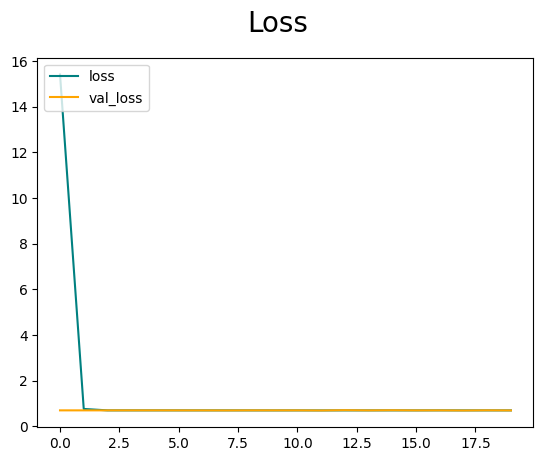

In [ ]:
fig = plt.figure()
plt.plot(hist4.history['loss'], color='teal', label='loss')
plt.plot(hist4.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

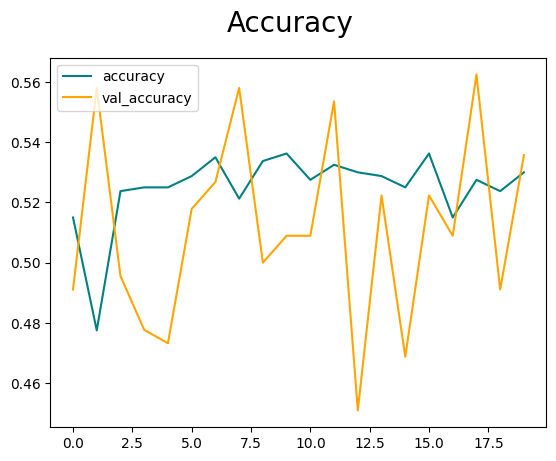

In [ ]:
fig = plt.figure()
plt.plot(hist4.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist4.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat3 = model4.predict(X)
    # yhat3 = [1 if prediction > 0.5 else 0 for prediction in yhat3 ] ask the TA
    pre3.update_state(y, yhat3)
    re3.update_state(y, yhat3)
    acc3.update_state(y, yhat3)

1/1 [==============================] - 0s 86ms/step


In [ ]:
print(f"precision: {pre3.result().numpy()}, recall: {re3.result().numpy()}, accuracy: {acc3.result().numpy()}")

precision: 0.5128205418586731, recall: 0.11560693383216858, accuracy: 0.5099714994430542
